In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [24]:
dist = scipy.stats.norm(loc=180, scale=34)

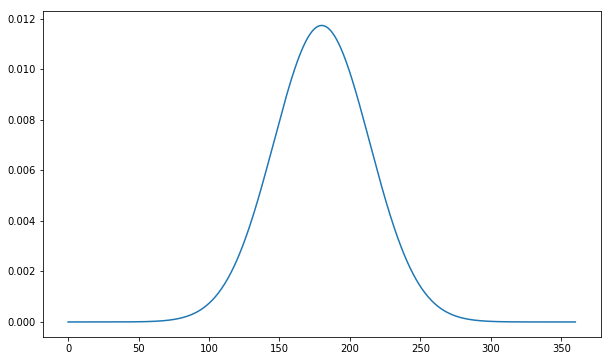

In [25]:
x = np.linspace(0, 360, 1000)
plt.plot(x, dist.pdf(x))

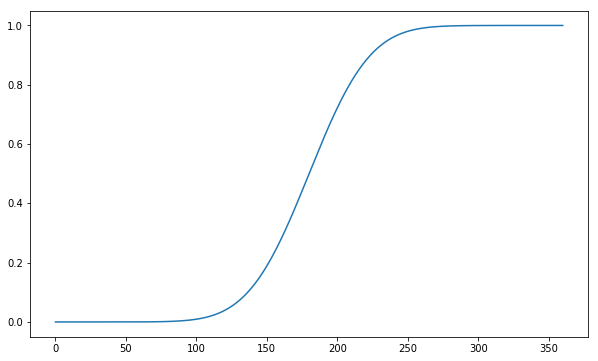

In [26]:
plt.plot(x, dist.cdf(x))

In [27]:
dist.cdf(155) - dist.cdf(120)

0.19227359021975707

In [28]:
new_dist = scipy.stats.binom(n=60, p=0.15)

In [34]:
new_dist.pmf(7)

0.1198565927095996

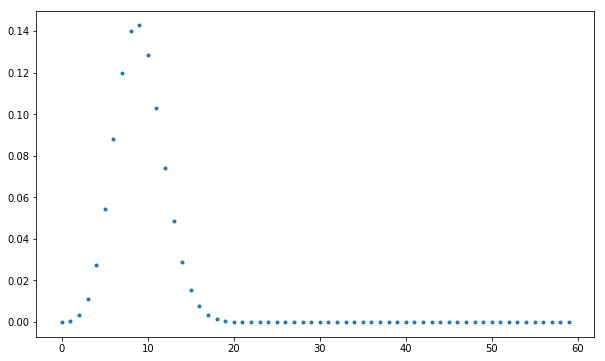

In [38]:
x = np.arange(60)
plt.plot(x, new_dist.pmf(x), '.')

## BinomialDistribution

In [9]:
class Distribution:
	
	def __init__(self, mu=0, sigma=1):
	
		""" Generic distribution class for calculating and 
		visualizing a probability distribution.
	
		Attributes:
			mean (float) representing the mean value of the distribution
			stdev (float) representing the standard deviation of the distribution
			data_list (list of floats) a list of floats extracted from the data file
			"""
		
		self.mean = mu
		self.stdev = sigma
		self.data = []


	def read_data_file(self, file_name):
	
		"""Function to read in data from a txt file. The txt file should have
		one number (float) per line. The numbers are stored in the data attribute.
				
		Args:
			file_name (string): name of a file to read from
		
		Returns:
			None
		
		"""
			
		with open(file_name) as file:
			data_list = []
			line = file.readline()
			while line:
				data_list.append(int(line))
				line = file.readline()
		file.close()
	
		self.data = data_list


In [10]:
from scipy.stats import binom

In [11]:
binom.pmf([4, 5, 6], 20, 0.3)

array([0.13042097, 0.17886305, 0.19163898])

In [12]:
np.arange(0, 5)

array([0, 1, 2, 3, 4])

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

DATAFILE_PATH = 'numbers_binomial.txt'


class BinomialDistribution(Distribution):

    """ Binomial distribution class for calculating and
    visualizing a Binomial distribution.

    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats to be extracted from the data file
        p (float) representing the probability of an event occurring

    """

    def __init__(self, p, n):
        """
        A binomial distribution is defined by two variables:
            the probability of getting a positive outcome
            the number of trials

        If you know these two values, you can calculate the mean and the standard deviation

        For example, if you flip a fair coin 25 times, p = 0.5 and n = 25
        You can then calculate the mean and standard deviation with the
        following formula:
            mean = p * n
            standard deviation = sqrt(n * p * (1 - p))
        """
        Distribution.__init__(self)
        self.p = p
        self.n = n
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()

    def calculate_mean(self):
        """Function to calculate the mean from p and n

        Args:
            None

        Returns:
            float: mean of the data set

        """
        return self.p * self.n

    def calculate_stdev(self):
        """Function to calculate the standard deviation from p and n.

        Args:
            None

        Returns:
            float: standard deviation of the data set

        """
        return math.sqrt(self.n * self.p * (1 - self.p))


    # TODO: write a replace_stats_with_data() method according to the specifications below. The read_data_file() from the Generaldistribution class can read in a data
    # file. Because the Binomaildistribution class inherits from the Generaldistribution class,
    # you don't need to re-write this method. However,  the method
    # doesn't update the mean or standard deviation of
    # a distribution. Hence you are going to write a method that calculates n, p, mean and
    # standard deviation from a data set and then updates the n, p, mean and stdev attributes.
    # Assume that the data is a list of zeros and ones like [0 1 0 1 1 0 1].
    #
    #       Write code that:
    #           updates the n attribute of the binomial distribution
    #           updates the p value of the binomial distribution by calculating the
    #               number of positive trials divided by the total trials
    #           updates the mean attribute
    #           updates the standard deviation attribute
    #
    #       Hint: You can use the calculate_mean() and calculate_stdev() methods
    #           defined previously.
    def replace_stats_with_data(self):
        """
        Function to calculate p and n from the data set. The function updates
        the p and n variables of the object.

        Args:
            None

        Returns:
            float: the p value
            float: the n value

        """
        self.read_data_file(DATAFILE_PATH)

        self.n = len(self.data)
        self.p = np.mean(self.data)

        return self.p, self.n

    def plot_bar(self):
        """
        Function to output a histogram of the instance variable data using
        matplotlib pyplot library.

        Args:
            None

        Returns:
            None
        """
        plt.hist(self.data)

    #TODO: Calculate the probability density function of the binomial distribution
    def pdf(self, k):
        """Probability density function calculator for the binomial distribution.

        Args:
            k (float): point for calculating the probability density function


        Returns:
            float: probability density function output
        """
        return binom.pmf(k, self.n, self.p)

    def plot_pdf(self):
        """Function to plot the pdf of the binomial distribution

        Args:
            None

        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot

        """
        x = np.arange(0, self.n + 1)
        y = self.pdf(x)
        
        plt.bar(x, y)
        plt.title('Mass probability function plot.')
        plt.xlabel('k')
        plt.ylabel('P(k)')
        
        return x.tolist(), y.tolist()

    # write a method to output the sum of two binomial distributions. Assume both distributions have the same p value.
    def __add__(self, other):
        """Function to add together two Binomial distributions with equal p

        Args:
            other (Binomial): Binomial instance

        Returns:
            Binomial: Binomial distribution

        """
        try:
            assert self.p == other.p, 'p values are not equal'
        except AssertionError as error:
            raise
        return BinomialDistribution(self.p, self.n + other.n)

    def __repr__(self):
        """Function to output the characteristics of the Binomial instance

        Args:
            None

        Returns:
            string: characteristics of the Binomial object

        """
        return 'mean {:.2}, standard deviation {:.2}, p {:.2}, n {}'.format(self.mean,
                                                                  self.stdev,
                                                                  self.p,
                                                                  self.n)

In [54]:
p = 0.3
n = 10

binomial = BinomialDistribution(p, n)

In [55]:
len(binomial.data)

0

In [56]:
binomial.replace_stats_with_data()

(0.6153846153846154, 13)

In [57]:
data = binomial.data
data

[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

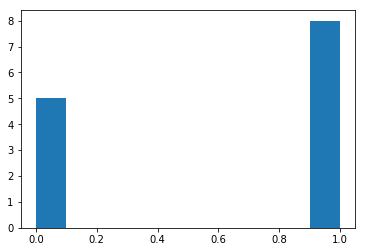

In [58]:
plt.hist(data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [4.030384466833639e-06,
  8.38319969101396e-05,
  0.0008047871703373391,
  0.0047214180659790475,
  0.018885672263916246,
  0.05439073612007867,
  0.11603357038950138,
  0.18565371262320224,
  0.22278445514784234,
  0.19803062679808253,
  0.12673960115077249,
  0.055304553229428184,
  0.014747880861180852,
  0.001815123798299183])

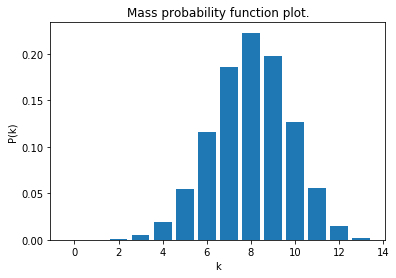

In [59]:
binomial.plot_pdf()

In [60]:
binomial

mean 3.0, standard deviation 1.4, p 0.62, n 13

In [61]:
binomial + binomial

mean 1.6e+01, standard deviation 2.5, p 0.62, n 26

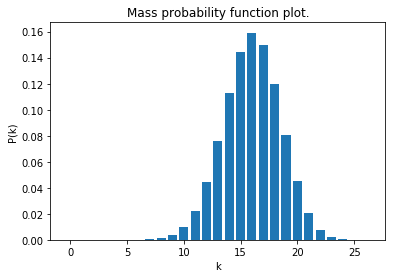

In [63]:
_ = (binomial + binomial).plot_pdf()

In [64]:
binomial.p

0.6153846153846154

In [65]:
binomial.n

13

In [66]:
26*0.6

15.6

In [67]:
13*0.6

7.8